In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted
import os
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns


In [15]:
path_ground = r"ground"
path_weka = r"wekaOut"
seg_ground_path = natsorted(glob(os.path.join(path_ground, "*.tiff")))
seg_weka_path = natsorted(glob(os.path.join(path_weka, "*.tif")))

print(seg_ground_path)
print("##########################")
print(len(seg_ground_path),len(seg_weka_path))
print("##########################")
print(seg_weka_path)


['ground\\I0_06.tiff', 'ground\\I0_019.tiff', 'ground\\I0_020.tiff', 'ground\\I0_025.tiff', 'ground\\I0_033.tiff', 'ground\\I0_038.tiff', 'ground\\I1_01.tiff', 'ground\\I1_017.tiff', 'ground\\I1_019.tiff', 'ground\\I1_027.tiff', 'ground\\I1_029.tiff', 'ground\\I3_013.tiff', 'ground\\I3_017.tiff', 'ground\\I3_030.tiff', 'ground\\I3_035.tiff', 'ground\\I3_039.tiff', 'ground\\I4_014.tiff', 'ground\\I4_023.tiff', 'ground\\I4_027.tiff', 'ground\\I4_028.tiff', 'ground\\I4_031.tiff', 'ground\\I4_036.tiff', 'ground\\I6_02.tiff', 'ground\\I6_013.tiff', 'ground\\I6_020.tiff', 'ground\\I6_025.tiff', 'ground\\I6_034.tiff', 'ground\\I6_038.tiff', 'ground\\I6_040.tiff', 'ground\\I6_050.tiff', 'ground\\I6_054.tiff', 'ground\\I7_02.tiff', 'ground\\I7_013.tiff', 'ground\\I7_020.tiff', 'ground\\I7_025.tiff', 'ground\\I7_034.tiff', 'ground\\I7_038.tiff', 'ground\\I7_040.tiff', 'ground\\I7_050.tiff', 'ground\\I7_054.tiff', 'ground\\I8_02.tiff', 'ground\\I8_013.tiff', 'ground\\I8_020.tiff', 'ground\\I8_025

(736, 736)
0 255


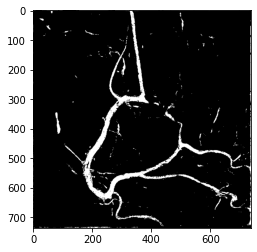

In [16]:
img = cv2.imread(seg_weka_path[10],0)

print(img.shape)
print(img.min(),img.max())

plt.imshow(img,cmap="gray")
plt.show()

In [28]:
#load all images and convert to 0-1

seg_ground = []
seg_weka = []
for i in range(len(seg_weka_path)):
  img_g = cv2.imread(seg_ground_path[i],0)
  img_w = cv2.imread(seg_weka_path[i],0)

  #convert to binary
  img_g = np.where(img_g == 0 ,0,1)
  img_w = np.where(img_w == 0 ,0,1)

  seg_ground.append(img_g)
  seg_weka.append(img_w)


In [29]:
print(seg_weka[0].flatten())

[0 0 0 ... 0 0 0]


In [19]:
def dice_score(true, pred):
  true_bool = np.asarray(true).astype(np.bool)
  pred_bool = np.asarray(pred).astype(np.bool)
  inter = np.logical_and(true_bool, pred_bool)

  return (2 * inter.sum()) / (true_bool.sum()
                              + pred_bool.sum())


In [31]:
#Calculate metrics for intersection of projections
np.set_printoptions(precision=5, suppress=True)
metrics = []

for i in range(len(seg_ground)):
  #get image 
  g = seg_ground[i]
  w = seg_weka[i]
  #calculate metrics for each reconstruction
  TN, FP, FN, TP = confusion_matrix(g.flatten(), w.flatten()).ravel()
  total = TN + FP + FN + TP
  accuracy = (TP + TN)/(FP+FN+TP+TN)
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  dice = dice_score(np.array(g.flatten()), np.array(w.flatten()))
  #f1 = 2*(precision*recall)/(precision+recall)
  scores = np.array([TN/total, FP/total, FN/total,
                     TP/total, dice, precision, recall])
  metrics.append(scores)
  print("Metrics using ", str(i+1),
        " projections: [tn, fp, fn, tp, dice, precision, recall]", scores)


<ipython-input-19-e6ea7792b180>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  true_bool = np.asarray(true).astype(np.bool)
<ipython-input-19-e6ea7792b180>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred_bool = np.asarray(pred).astype(np.bool)


Metrics using  1  projections: [tn, fp, fn, tp, dice, precision, recall] [0.97722 0.01328 0.00229 0.00721 0.4807  0.3518  0.75869]
Metrics using  2  projections: [tn, fp, fn, tp, dice, precision, recall] [0.94531 0.01747 0.00764 0.02959 0.70215 0.62882 0.79484]
Metrics using  3  projections: [tn, fp, fn, tp, dice, precision, recall] [0.93863 0.01958 0.00832 0.03347 0.70577 0.63087 0.80085]
Metrics using  4  projections: [tn, fp, fn, tp, dice, precision, recall] [0.93414 0.0249  0.00694 0.03402 0.68119 0.57736 0.83057]
Metrics using  5  projections: [tn, fp, fn, tp, dice, precision, recall] [0.92226 0.03129 0.00788 0.03856 0.66317 0.55208 0.83025]
Metrics using  6  projections: [tn, fp, fn, tp, dice, precision, recall] [0.92737 0.02642 0.00914 0.03708 0.67592 0.58394 0.8023 ]
Metrics using  7  projections: [tn, fp, fn, tp, dice, precision, recall] [0.96375 0.01101 0.00875 0.01649 0.62536 0.59973 0.65328]
Metrics using  8  projections: [tn, fp, fn, tp, dice, precision, recall] [0.93075 0

In [32]:
# average metric accross the different projections
metrics = np.array(metrics)
avg_metric = np.zeros(len(metrics[0]))
for metric in metrics:
    avg_metric += metric

avg_metric = avg_metric/len(metrics)

print(
    "Average metrics for given offset: [tn, fp, fn, tp, dice, precision, recall]", scores)


Average metrics for given offset: [tn, fp, fn, tp, dice, precision, recall] [0.93228 0.01758 0.02364 0.02651 0.56261 0.60125 0.52864]


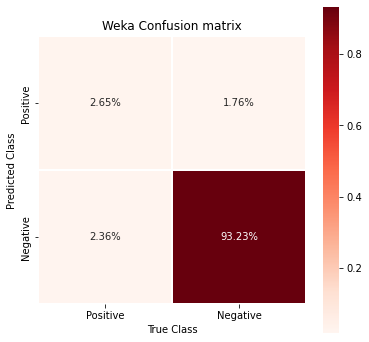

In [35]:

cmat = [[scores[3], scores[1]], [scores[2], scores[0]]]

plt.figure(figsize=(6, 6))
plt.title("Weka Confusion matrix")
x_labels = ["Positive", "Negative"]
y_labels = ["Positive", "Negative"]
sns.heatmap(cmat/np.sum(cmat), cmap="Reds", annot=True, fmt='.2%', square=1,   linewidth=2.,
            xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()
